In [2]:
include("../src/vafdyn.jl")
using .VAFDyn

In [3]:
using LaTeXStrings

In [4]:
using Plots
gr()

Plots.GRBackend()

In [76]:
params = Dict(
    "N"=>500,
    "ρ"=>1.,
    "ϕ"=>5.,
    "μ"=>5.0
)

evolveTimes = [50,100,200,500,1000]

display(params)

Dict{String,Real} with 4 entries:
  "μ" => 5.0
  "N" => 500
  "ρ" => 1.0
  "ϕ" => 5.0

In [77]:
dfs_Time = []

@time for t in evolveTimes
    dfs = VAFDyn.DFreqspace(params["N"])
    VAFDyn.evolveVAF(dfs, params, t)
    push!(dfs_Time, dfs)
end

  1.419820 seconds (350.64 k allocations: 42.213 MiB)


In [78]:
nEq_f = ((2params["ρ"]+params["ϕ"])/params["ρ"])params["μ"] ./ dfs_Time[1].freqs_f[2:end-1];

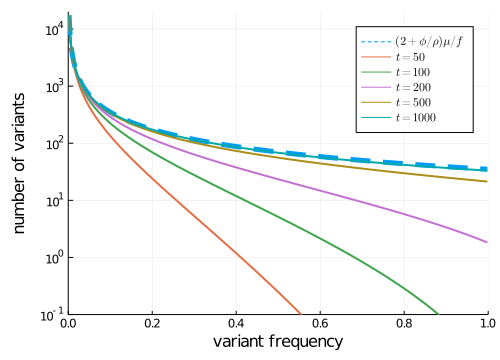

In [70]:
# plotting
h = plot(dfs_Time[1].freqs_f[2:end-1], nEq_f,
    yaxis=:log10,
    label=L" (2+\phi/\rho)\mu / f",
    linewidth=5,
    size=(500,360),
    linestyle=:dash)

for i in 1:length(evolveTimes)
    plot!(dfs_Time[i].freqs_f[2:end-1], dfs_Time[i].n_f[2:end-1],
        label=latexstring("t="*string(evolveTimes[i])),
        linewidth=2)
end
xlims!((0, 1))
ylims!((10^-1, 2*10^4))
xlabel!("variant frequency")
ylabel!("number of variants")
display(h)

# sampledfs = VAFDyn.sampler(dfs, 80)

# plot!(h, sampledfs.freqs_f[2:end], sampledfs.n_f[2:end], label="sampled", yaxis=:log10)
# display(h)

# savefig("../figures/vafEquilibrium.pdf")

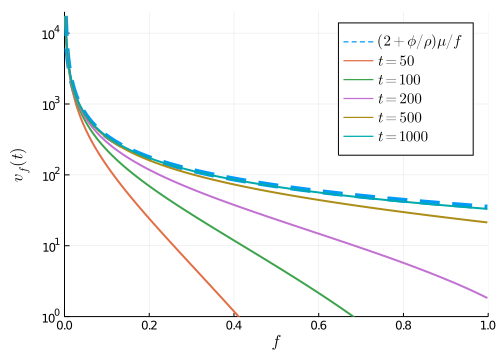

In [79]:
# plotting
p1= plot(dfs_Time[1].freqs_f[2:end-1], nEq_f,
    yaxis=:log10,
    label=L" (2+\phi/\rho)\mu / f",
#     label="(2+ϕ/ρ)μ/f",
    linewidth=5,
    size=(500,360),
    legendfontsize=10,
#     labelfontsize=10,
    linestyle=:dash)

for i in 1:length(evolveTimes)
    plot!(dfs_Time[i].freqs_f[2:end-1], dfs_Time[i].n_f[2:end-1],
        label=latexstring("t="*string(evolveTimes[i])),
        linewidth=2)
end
xlims!((0, 1))
ylims!((10^0, 2*10^4))
xlabel!(L"f")
ylabel!(L"v_f(t)")
display(p1)

# sampledfs = VAFDyn.sampler(dfs, 80)

# plot!(h, sampledfs.freqs_f[2:end], sampledfs.n_f[2:end], label="sampled", yaxis=:log10)
# display(h)

savefig(p1, "../figures/vafEquilibrium.pdf")

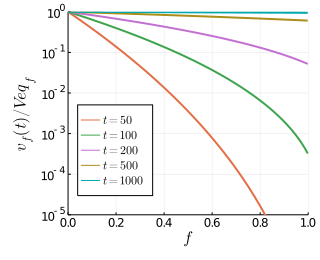

In [89]:
# plotting
p2 = plot(dfs_Time[1].freqs_f[2:end-1], (dfs_Time[1].n_f[2:end-1] ./ nEq_f),
    label=latexstring("t="*string(evolveTimes[1])),
    yaxis=:log10,
    linewidth=2,
    legend=:bottomleft,
    legendfontsize=8,
    color=2,
    size=(320,260))

for i in 2:length(evolveTimes)
    plot!(dfs_Time[i].freqs_f[2:end-1], (dfs_Time[i].n_f[2:end-1] ./ nEq_f),
        label=latexstring("t="*string(evolveTimes[i])),
        color=i+1,
        linewidth=2)
end
xlims!((0, 1))
ylims!((10^-5, 10^0))
xlabel!(L"f")
ylabel!(L"v_f(t) / Veq_f")
display(p2)

# savefig(p2, "../figures/vafEqDifference.pdf")

In [73]:
params1 = Dict(
    "N"=>500,
    "ρ"=>1.,
    "ϕ"=>5.,
    "μ"=>1.0
)

params2 = Dict(
    "N"=>500,
    "ρ"=>1.,
    "ϕ"=>5.,
    "μ"=>5.0
)

params3 = Dict(
    "N"=>500,
    "ρ"=>1.,
    "ϕ"=>5.,
    "μ"=>20.0
)

paramSets_pars = [params1, params2, params3]

evolveTime = 200

200

In [74]:
sols_set = []

@time for params in paramSets_pars
    dfs = VAFDyn.DFreqspace(params["N"])
    VAFDyn.evolveVAF(dfs, params, evolveTime)
    nEq_f = ((2params["ρ"]+params["ϕ"])/params["ρ"])params["μ"] ./ dfs.freqs_f[2:end-1];
    set = Dict(
        "dfs"=>dfs,
        "params"=>params,
        "nEq_f"=>nEq_f
    )
    push!(sols_set, set)
end

  1.225561 seconds (210.63 k allocations: 25.370 MiB, 7.46% gc time)


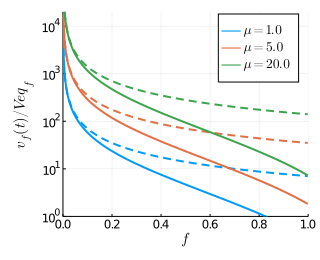

In [75]:
dfs = sols_set[1]["dfs"]
params = sols_set[1]["params"]
nEq_f = sols_set[1]["nEq_f"]


p3 = plot(dfs.freqs_f[2:end-1], nEq_f,
    yaxis=:log10,
    label="",
    linewidth=2,
    size=(320,260),
    linestyle=:dash,
    legendfontsize=9,
    labelfontsize=10,
    color=1)
plot!(dfs.freqs_f[2:end-1], dfs.n_f[2:end-1],
    label=latexstring("\\mu="*string(params["μ"])),
    color=1,
    linewidth=2)

for (i, set) in enumerate(sols_set[2:end])
    dfs = set["dfs"]
    params = set["params"]
    nEq_f = set["nEq_f"]
    plot!(dfs.freqs_f[2:end-1], nEq_f,
        label="",
        linewidth=2,
        linestyle=:dash,
        color=i+1)
    plot!(dfs.freqs_f[2:end-1], dfs.n_f[2:end-1],
        label=latexstring("\\mu="*string(params["μ"])),
        color=i+1,
        linewidth=2)
end
xlims!((0, 1))
ylims!((10^0, 2*10^4))
xlabel!(L"f")
ylabel!(L"v_f(t) / Veq_f")
display(p3)

savefig(p3, "../figures/VAFmutRateEffect.pdf")